# Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import scipy

In [2]:
data = pd.read_csv("../data/temperature/monthly_csv.csv", sep=",")

In [3]:
data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
gcag_data = pd.DataFrame(data[data['Source'] == 'GCAG'])
gcag_data.shape

(1644, 3)

In [6]:
gcag_data['ts'] = pd.to_datetime(gcag_data['Date']).astype(np.int64)

In [7]:
np_array = gcag_data[['ts', 'Mean']].values

In [8]:
gcag_data.head()

,Source,Date,Mean,ts
0,GCAG,2016-12-06,0.7895,1480982400000000000
2,GCAG,2016-11-06,0.7504,1478390400000000000
4,GCAG,2016-10-06,0.7292,1475712000000000000
6,GCAG,2016-09-06,0.8767,1473120000000000000
8,GCAG,2016-08-06,0.8998,1470441600000000000


In [9]:
np_array[:,0] = (np_array[:,0] / 1000000.0)

In [10]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(np_array)

In [11]:
gcag_data['cluster'] = kmeans.predict(np_array)

In [12]:
gcag_data['mean1'] = gcag_data['Mean'] * gcag_data['cluster'] 
gcag_data['mean0'] = gcag_data['Mean'] * (1-gcag_data['cluster'] )

In [13]:
gcag_data.head()

,Source,Date,Mean,ts,cluster,mean1,mean0
0,GCAG,2016-12-06,0.7895,1480982400000000000,0,0.0,0.7895
2,GCAG,2016-11-06,0.7504,1478390400000000000,0,0.0,0.7504
4,GCAG,2016-10-06,0.7292,1475712000000000000,0,0.0,0.7292
6,GCAG,2016-09-06,0.8767,1473120000000000000,0,0.0,0.8767
8,GCAG,2016-08-06,0.8998,1470441600000000000,0,0.0,0.8998


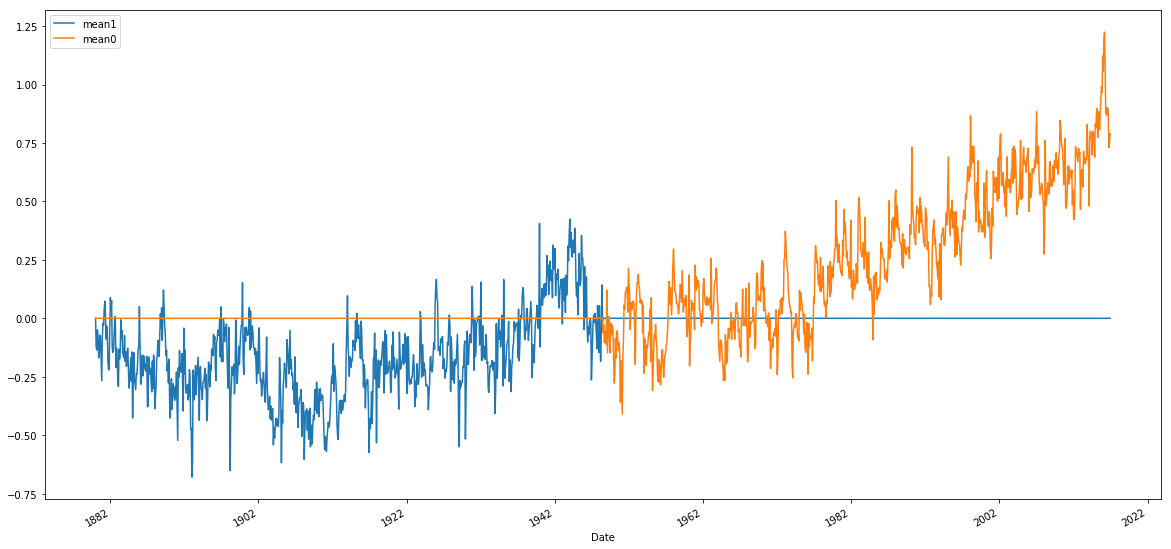

In [14]:
gcag_data[['Date', 'mean1', 'mean0']].set_index('Date').plot(figsize=(20,10));

In [15]:
gcag_data[gcag_data['cluster'] == 1.0].max()

Source                    GCAG
Date       1948-06-06 00:00:00
Mean                    0.4241
ts         -680745600000000000
cluster                      1
mean1                   0.4241
mean0                       -0
dtype: object

In [16]:
gcag_data[gcag_data['cluster'] == 0.0].min()

Source                    GCAG
Date       1948-07-06 00:00:00
Mean                   -0.4101
ts         -678153600000000000
cluster                      0
mean1                        0
mean0                  -0.4101
dtype: object

In [17]:
gcag_data[gcag_data.Date < '1948-07-06'].describe()
gcag_data[gcag_data.Date >= '1948-07-06'].describe()

,Mean,ts,cluster,mean1,mean0
count,822.000000,8.220000e+02,822.0,822.0,822.000000
mean,0.262321,4.014057e+17,0.0,0.0,0.262321
std,0.298158,6.244068e+17,0.0,0.0,0.298158
min,-0.410100,-6.781536e+17,0.0,0.0,-0.410100
25%,0.028150,-1.383480e+17,0.0,-0.0,0.028150
50%,0.226550,4.014144e+17,0.0,0.0,0.226550
75%,0.497325,9.411768e+17,0.0,0.0,0.497325
max,1.224500,1.480982e+18,0.0,0.0,1.224500


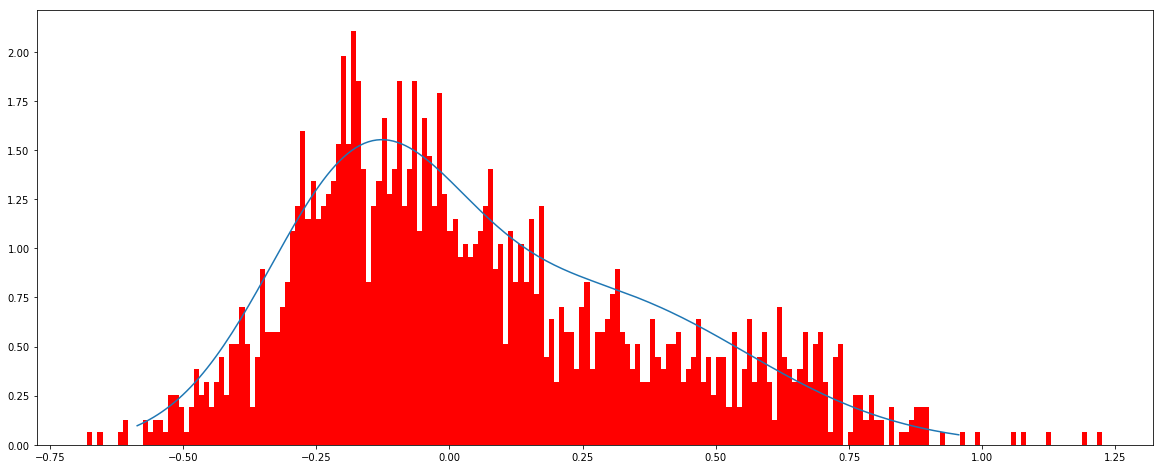

In [18]:
date_desc_pre = gcag_data[gcag_data.Date < '1948-07-06'].describe()
date_desc_post = gcag_data[gcag_data.Date >= '1948-07-06'].describe()

loc_pre = date_desc_pre['Mean']['mean']
scale_pre = date_desc_pre['Mean']['std']

loc_post = date_desc_post['Mean']['mean']
scale_post = date_desc_post['Mean']['std']

lower = scipy.stats.norm.ppf(0.01,loc_pre,scale_pre)
upper = scipy.stats.norm.ppf(0.99,loc_post,scale_post)
x_comp = scipy.linspace(lower,upper,200)


sum_pre = gcag_data[gcag_data.Date < '1948-07-06']['Mean'].sum()
sum_post = gcag_data[gcag_data.Date >= '1948-07-06']['Mean'].sum()

alpha = 200/(np.abs(sum_pre) + np.abs(sum_post))

y_1 = scipy.stats.norm.pdf(x_comp,loc_pre,scale_pre) 
y_2 = scipy.stats.norm.pdf(x_comp,loc_post,scale_post)

y_comp = alpha * (y_1 + y_2)

plt.figure(1, figsize=(20, 8))

plt.hist(gcag_data['Mean'], bins=200, density=True, color='red')
plt.plot(x_comp, y_comp)

plt.show()

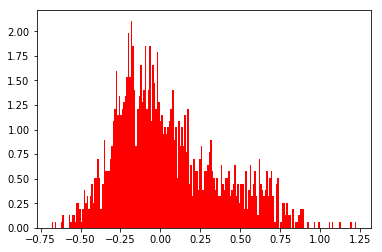

In [19]:
hist_data = plt.hist(gcag_data['Mean'], bins=200, density=True, color='red')

In [20]:
hist_scaled = hist_data[0] / hist_data[0].sum()

In [21]:
calc_1 = scipy.stats.norm.pdf(hist_data[1],loc_pre,scale_pre) 
calc_2 = scipy.stats.norm.pdf(hist_data[1],loc_post,scale_post)

In [22]:
calc_comb = calc_1 + calc_2
calc_comb = calc_comb/calc_comb.sum()

In [23]:
((calc_comb[0:200] - hist_scaled)*(calc_comb[0:200] - hist_scaled)).sum()

0.0006883220653137221